In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!nvidia-smi

Tue Oct 20 14:30:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.43       Driver Version: 456.43       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070   WDDM  | 00000000:01:00.0  On |                  N/A |
| 51%   43C    P8    16W / 175W |    867MiB /  8192MiB |      3%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
# reshape
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

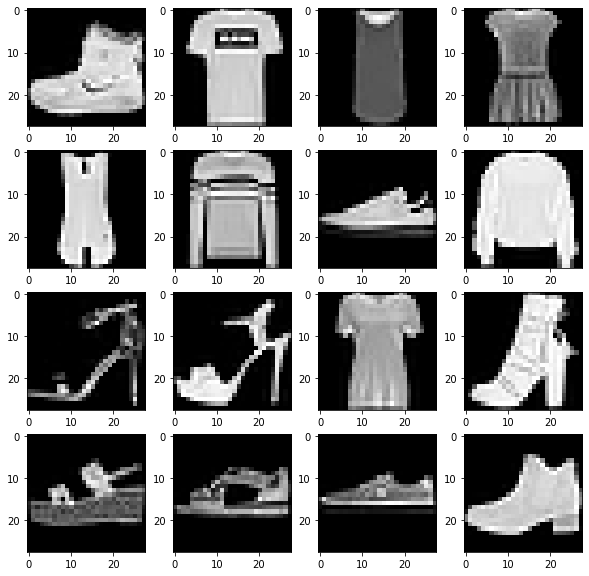

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [8]:
plt.figure(figsize = (10, 10))
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_images[c].reshape(28,28), cmap='gray')
plt.show()
print(train_labels[:16])

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 10s 217us/sample - loss: 0.4632 - accuracy: 0.8347 - val_loss: 0.3887 - val_accuracy: 0.8613
Epoch 2/25
45000/45000 [==============================] - 7s 153us/sample - loss: 0.3408 - accuracy: 0.8774 - val_loss: 0.3693 - val_accuracy: 0.8696
Epoch 3/25
45000/45000 [==============================] - 7s 155us/sample - loss: 0.2865 - accuracy: 0.8951 - val_loss: 0.3567 - val_accuracy: 0.8769
Epoch 4/25
45000/45000 [==============================] - 7s 154us/sample - loss: 0.2471 - accuracy: 0.9070 - val_loss: 0.3903 - val_accuracy: 0.8688
Epoch 5/25
45000/45000 [==============================] - 7s 152us/sample - loss: 0.2135 - accuracy: 0.9203 - val_loss: 0.4415 - val_accuracy: 0.8636
Epoch 6/25
45000/45000 [==============================] - 7s 152us/sample - loss: 0.1863 - accuracy: 0.9308 - val_loss: 0.4940 - val_accuracy: 0.8678
Epoch 7/25
45000/45000 [=========================

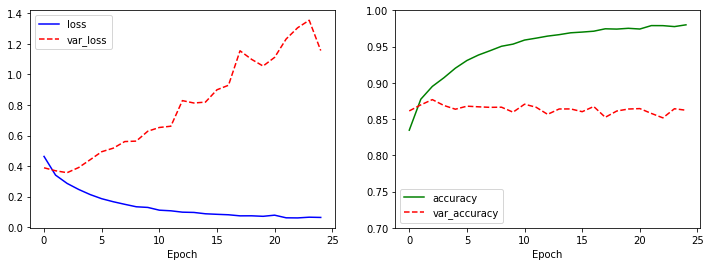

In [10]:
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='var_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='var_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [11]:
model.evaluate(test_images, test_labels, verbose=0)

[1.246512342131138, 0.8537]

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 7s 146us/sample - loss: 0.5254 - accuracy: 0.8088 - val_loss: 0.3681 - val_accuracy: 0.8619
Epoch 2/25
45000/45000 [==============================] - 6s 129us/sample - loss: 0.3654 - accuracy: 0.8682 - val_loss: 0.3426 - val_accuracy: 0.8685
Epoch 3/25
45000/45000 [==============================] - 6s 127us/sample - loss: 0.3204 - accuracy: 0.8832 - val_loss: 0.3109 - val_accuracy: 0.8861
Epoch 4/25
45000/45000 [==============================] - 6s 126us/sample - loss: 0.2941 - accuracy: 0.8923 - val_loss: 0.2954 - val_accuracy: 0.8922
Epoch 5/25
45000/45000 [==============================] - 6s 128us/sample - loss: 0.2699 - accuracy: 0.9008 - val_loss: 0.3002 - val_accuracy: 0.8925
Epoch 6/25
45000/45000 [==============================] - 6s 125us/sample - loss: 0.2559 - accuracy: 0.9067 - val_loss: 0.2993 - val_accuracy: 0.8933
Epoch 7/25
45000/45000 [==========================

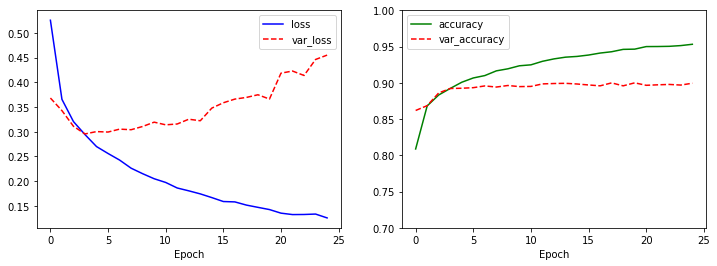

[0.474064940200001, 0.8929]

In [13]:
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='var_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='var_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_images, test_labels, verbose=0)

# **퍼포먼스 높이기**

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)        

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 12s 272us/sample - loss: 0.5701 - accuracy: 0.7914 - val_loss: 0.3439 - val_accuracy: 0.8702
Epoch 2/25
45000/45000 [==============================] - 11s 239us/sample - loss: 0.3620 - accuracy: 0.8692 - val_loss: 0.2693 - val_accuracy: 0.8971
Epoch 3/25
45000/45000 [==============================] - 11s 236us/sample - loss: 0.3165 - accuracy: 0.8861 - val_loss: 0.2680 - val_accuracy: 0.8984
Epoch 4/25
45000/45000 [==============================] - 11s 237us/sample - loss: 0.2978 - accuracy: 0.8947 - val_loss: 0.2394 - val_accuracy: 0.9122
Epoch 5/25
45000/45000 [==============================] - 11s 238us/sample - loss: 0.2815 - accuracy: 0.8992 - val_loss: 0.2252 - val_accuracy: 0.9201
Epoch 6/25
45000/45000 [==============================] - 11s 240us/sample - loss: 0.2711 - accuracy: 0.9039 - val_loss: 0.2177 - val_accuracy: 0.9193
Epoch 7/25
45000/45000 [====================

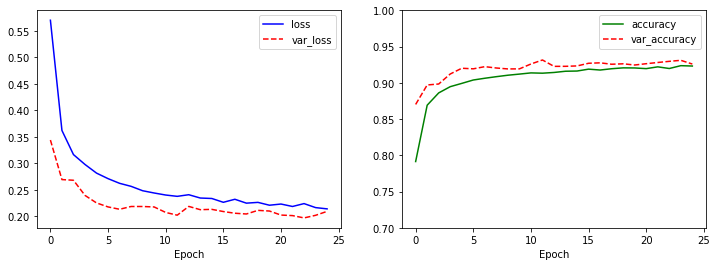

[0.2221036792755127, 0.9238]

In [15]:
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='var_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='var_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_images, test_labels, verbose=0)

# **이미지 보강**

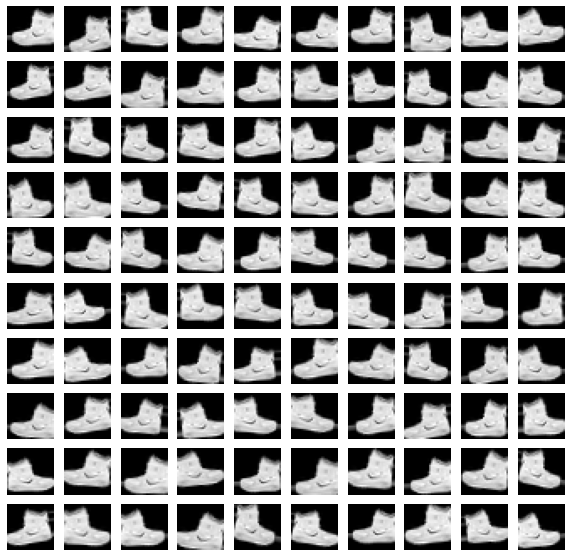

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_images[0].reshape(28*28), 100).reshape(-1, 28,28,1),
                    np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for c in range(100):
    plt.subplot(10, 10, c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [17]:
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False
)

augment_size = 30000

randidx = np.random.randint(train_images.shape[0], size=augment_size)
x_augmented = train_images[randidx].copy()
y_augmented = train_labels[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

train_images = np.concatenate((train_images, x_augmented))
train_labels = np.concatenate((train_labels, y_augmented))

print(train_images.shape)

(90000, 28, 28, 1)


Train on 67500 samples, validate on 22500 samples
Epoch 1/25
67500/67500 [==============================] - 17s 254us/sample - loss: 0.5657 - accuracy: 0.7933 - val_loss: 0.6063 - val_accuracy: 0.7725
Epoch 2/25
67500/67500 [==============================] - 16s 241us/sample - loss: 0.3786 - accuracy: 0.8635 - val_loss: 0.5343 - val_accuracy: 0.7972
Epoch 3/25
67500/67500 [==============================] - 16s 241us/sample - loss: 0.3361 - accuracy: 0.8797 - val_loss: 0.4548 - val_accuracy: 0.8281
Epoch 4/25
67500/67500 [==============================] - 16s 241us/sample - loss: 0.3129 - accuracy: 0.8880 - val_loss: 0.4471 - val_accuracy: 0.8276
Epoch 5/25
67500/67500 [==============================] - 16s 241us/sample - loss: 0.3005 - accuracy: 0.8913 - val_loss: 0.4487 - val_accuracy: 0.8268
Epoch 6/25
67500/67500 [==============================] - 16s 243us/sample - loss: 0.2931 - accuracy: 0.8960 - val_loss: 0.3931 - val_accuracy: 0.8515
Epoch 7/25
67500/67500 [====================

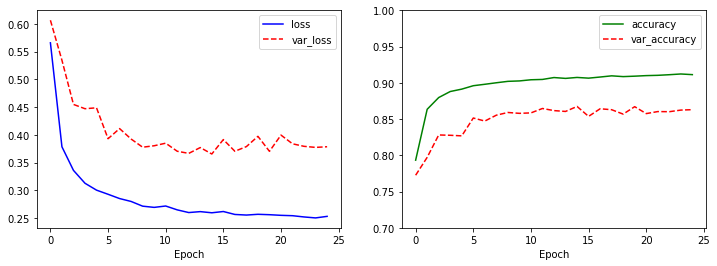

[0.21519771897792817, 0.9231]

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='var_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='var_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_images, test_labels, verbose=0)

# CNN-CIFAR10 데이터

In [60]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

ERROR! Session/line number was not unique in database. History logging moved to new session 282


In [61]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [62]:
train_images = train_images.reshape(-1, 32, 32, 3)
test_images = test_images.reshape(-1, 32, 32, 3)

In [63]:
train_images.shape

(50000, 32, 32, 3)

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_105 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 8, 8, 256)       

In [70]:
history = model.fit(train_images, train_labels, epochs=70, validation_split=0.25)

Train on 82500 samples, validate on 27500 samples
Epoch 1/70
82500/82500 [==============================] - 23s 280us/sample - loss: 1.6273 - accuracy: 0.3996 - val_loss: 1.3234 - val_accuracy: 0.5179
Epoch 2/70
82500/82500 [==============================] - 22s 269us/sample - loss: 1.2847 - accuracy: 0.5399 - val_loss: 1.1676 - val_accuracy: 0.5810
Epoch 3/70
82500/82500 [==============================] - 22s 270us/sample - loss: 1.1645 - accuracy: 0.5903 - val_loss: 1.1278 - val_accuracy: 0.5999
Epoch 4/70
82500/82500 [==============================] - 23s 274us/sample - loss: 1.0881 - accuracy: 0.6215 - val_loss: 1.0528 - val_accuracy: 0.6265
Epoch 5/70
82500/82500 [==============================] - 23s 274us/sample - loss: 1.0395 - accuracy: 0.6410 - val_loss: 0.9829 - val_accuracy: 0.6533
Epoch 6/70
82500/82500 [==============================] - 23s 274us/sample - loss: 1.0017 - accuracy: 0.6540 - val_loss: 0.9673 - val_accuracy: 0.6680
Epoch 7/70
82500/82500 [====================

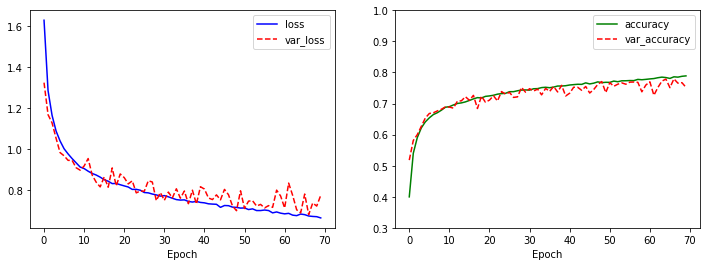

[0.6419438889026642, 0.8019]

In [71]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='var_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='var_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.3, 1)
plt.legend()

plt.show()

model.evaluate(test_images, test_labels, verbose=0)

In [68]:
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False
)

augment_size = 30000

randidx = np.random.randint(train_images.shape[0], size=augment_size)
x_augmented = train_images[randidx].copy()
y_augmented = train_labels[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

train_images = np.concatenate((train_images, x_augmented))
train_labels = np.concatenate((train_labels, y_augmented))

print(train_images.shape)

(110000, 32, 32, 3)
